# Tema 4

## Análisis estadístico exploratorio

El análsis estadístico exploratorio permite conocer los datos con los que vamos a trabajar.

Explorar los datos consiste principalmente en las actividades de manipulación, resumen, y visualización de datos. 

El objetivo de este práctico, es el de afianzar los conceptos relacionados con la estadística descriptiva en R. 

Esta libreta se organiza de la siguiente manera:

1. Medidas descriptivas en R
2. Normalización de variables
3. Visualización de datos

### 1. Medidas descriptivas en R

La primera aproximación en estadística descriptiva tiene que ver con lo que se denominan medidas de descriptivas, las cuales incluyen medidas de centralización y de dispersión.



 |Medidas          |Estadístico             |Función    |
 |:----------------|:-----------------------|:----------|
 |Tendencia central|Media aritmética        |`mean`     |
 |                 |Mediana                 |`median`   |
 |                 |Moda                    |No definida|
 |Dispersión       |Varianza                |`var`      |
 |                 |Desvío estandar         |`sd`       |
 |                 |Rango                   |`range`    |
 |                 |Coeficiente de variación|No definida|

Comencemos definiendo un conjunto de datos de **variables numéricas**. 

In [1]:
v <- sample(1:5, 10, replace = TRUE)

Observemos que el vector es generado con 10 elementos numéricos enteros `1:5` del 1 al 5. Finalmente, el parámetro `replace = TRUE` indica a la función `sample` que la muestra se realice con reemplazo.

De esta manera, nuestro vector queda definido como

In [72]:
v

[1] 1 2 2 2 5 2 3 3 2 2

Ahora veamos algunas de las **medidas de tendencia central** para los datos contenidos en nuetro vector. 

In [73]:
mean(v)

[1] 2.4

median(v)

La moda no se encuentra definida en R. Sin embargo, es posible implementar una función para esta medida en forma sencilla. 

Para ello podemos usar las funciones `table` y `names`, donde la primera nos permite generar una estructura de tabla a partir de un conjunto de datos, y la segunda nos permite obtener los nombres de los elementos contenidos en dicha estructura.

En el ejemplo, `table` genera una [tabla de contingencia](https://es.wikipedia.org/wiki/Tabla_de_contingencia) a partir del vector *v*, donde la primera fila contiene los nombres de los elementos del vector, y la segunda fila contiene las frecuencias de cada elemento en el vector.

In [74]:
table(v)

v
1 2 3 5 
1 6 2 1 

Recurriendo a la función `max`, obtenemos el mayor elemento de la tabla de contingencia.

In [75]:
max(table(v))

[1] 6

Finalmente, establemos la condición para filtrar los valores de la tabla de contingencia que se correspondan con la frecuencia máxima de la misma.

*Nota*: Observe que puede contener más de un elemento.

In [76]:
table(v)[table(v) == max(table(v))]

2 
6

### Tu turno!

Define un vector con 1000 elementos enteros aleatorios entre 1 y 10. 

Luego utiliza las funciones de medidas de dispersión presentadas, y las de tendencia central (`sd` y `var`)

In [ ]:
# Generar un vector aleatorio y obtener sus medidas descriptivas

# Vector aleatorio
v <- c()                     # COMPLETAR generando el vector
                             # de 1000 elementos entre 1 y 10


# Medidas de tendencia central 
sprintf("Las medidas de dispersión del vector son:")

media_v <-                   # COMPLETAR con la media del vector
mediana_v <-                 # COMPLETAR con la mediana del vector
moda_v <-                    # COMPLETAR con la moda del vector

sprintf("Media: [%s]", paste(media_v, collapse=' '))
sprintf("Mediana: [%s]", paste(mediana_v, collapse=' '))
sprintf("Moda: [%s]", paste(moda_v, collapse=' '))

Ahora, genera las **medidas de dispersión** para el vector generado. 

*Nota*: El [coeficiente de variación](https://es.wikipedia.org/wiki/Coeficiente_de_variaci%C3%B3n) (CV) puede obtenerse mediante la relación entre la desviación estándar y la media aritmética.

**CV = desviación estándar / media aritmética**

### Tu turno!

Obtiene las medidas de dispersión para el vector generado anteriormente. 

In [77]:
# Medidas de dispersión
sprintf("Las medidas de tendencia central del vector son:")

varianza_v <-                   # COMPLETAR con la varianza del vector
desviacion_estandar_v <-        # COMPLETAR con la desviación estandar
                                # del vector
rango_v <-                      # COMPLETAR con el rango del vector
coeficiente_variación_v <-      # COMPLETAR con el coeficiente de variación


sprintf("Varianza: [%s]", paste(varianza_v, collapse=' '))
sprintf("Desviación estandar: [%s]", paste(desviacion_estandar_v, collapse=' '))
sprintf("Rango: [%s]", paste(rango_v, collapse=' '))
sprintf("Coeficiente de variación: [%s]", paste(coeficiente_variacion_v, collapse=' '))

[1] "Las medidas de dispersión del vector son:"

[1] "Media: [2.4]"

[1] "Mediana: [2]"

[1] "Moda: [6]"

## 2. Normalización de variables

Frecuentemente, requerimos que los datos con los que trabajamos cumplan ciertos supuestos, asociados a la distribución de probabilidad de la población. Uno de estos supuestos es de la normalidad o de [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal).

La normalización de una variable consiste en la transformación de ésta, un pre procesamiento aplicado a los datos.

*Nota*: El concepto de normalización de variables no debe confundirse con el de normalización de bases de datos.

Comencemos generando un vector con elementos enteros aleatorios del 1 al 5, y generemos con éste una tabla de contingencias.

Nota: Observe que indicamos probabilidades para garantizar la distribución normal.

In [3]:
v_norm <- sample(1:5, 1000, replace = TRUE, prob = c(0.1, 0.2, 0.4, 0.2, 0.1))

In [4]:
table(v_norm)

v_norm
  1   2   3   4   5 
 88 196 398 220  98 

Como podemos observar, la mayor cantidad de elementos se concentra alrededor del 3. Podemos confirmar esto mediante la obtención de la media aritmética.

In [114]:
mean(v_norm)

[1] 3.036

Uno de los test para evaluar la normalidad es el de [Shapiro-Wilks](https://es.wikipedia.org/wiki/Test_de_Shapiro%E2%80%93Wilk) y R tiene una implementación del mismo. Veamos el resultado de la aplicación del test.

In [115]:
shapiro.test(v_norm)


	Shapiro-Wilk normality test

data:  v_norm
W = 0.91256, p-value < 2.2e-16


El valor W aproximado a 1 (~0.9) y el p-valor menor a 0.05 (nivel de significancia) no podemos rechazar la hipótesis.

Ahora veamos qué ocurre con un conjunto de datos con una [distribución asimétrica](https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica)

In [14]:
v_skewed <- sample(1:5, 1000, replace = TRUE, prob = c(0.3, 0.4, 0.1, 0.1, 0.1))

In [117]:
table(v_skewed)

v_skewed
  1   2   3   4   5 
302 405  97 101  95 

In [118]:
mean(v_skewed)

[1] 2.282

In [162]:
shapiro.test(v_skewed)


	Shapiro-Wilk normality test

data:  v_skewed
W = 0.8207, p-value < 2.2e-16


Como observamos, el valor 0.8 es menor al 0.9 de la distribución normal, mientras que el p-valor se mantiene.

Ahora que podemos determinar el grado de normalidad, intentemos realizar un **pre proceso** a los datos para mejorar los resultados del test de normalidad. 

Comencemos con la función `log`

In [161]:
shapiro.test(log(v_skewed))


	Shapiro-Wilk normality test

data:  log(v_skewed)
W = 0.85914, p-value < 2.2e-16


Observamos que hay una mejora en el resultado del test. 

Probemos ahora con la función `log10`

In [163]:
shapiro.test(log10(v_skewed))


	Shapiro-Wilk normality test

data:  log10(v_skewed)
W = 0.85914, p-value < 2.2e-16


Aquí no vemos diferencias significativas entre ambas funciones log. 

Finalmente, probemos con la función `sin`

In [164]:
shapiro.test(sin(v_skewed))


	Shapiro-Wilk normality test

data:  sin(v_skewed)
W = 0.63424, p-value < 2.2e-16


Queda claro que para este conjunto de datos, el test de normalidad mejora con la aplicación de las funciones `log` y `log10`, sin embargo, empeora con la función `sin`

Nota: Cada conjunto de datos es diferente, y el pre proceso de los datos puede incluir la aplicación de varias funciones. 

### Tu turno!

Use los datos de 'data/data.csv' y determine si la 'variable2' corresponde a una distribución normal utilizando el test de shapiro.

In [77]:
# Determinar si la variable1 del conjunto de datos se corresponde con 
# una distribución normal.

# Leer los datos
data <- read.table('../data/data.csv', sep=',', header = TRUE)

In [141]:
# Aplicar el test de Shapiro-Wilks a la variable
test_shapiro <-          # COMPLETAR Aplicar el test de Shapiro-Wilks
                         # a la variable 2 (data$variable2)

ERROR: Error in parse(text = x, srcfile = src): <text>:10:0: unexpected end of input
8: test_shapiro <-          # COMPLETAR Aplicar el test de Shapiro-Wilks
9:                          # a la variable 2 (data$variable2)
  ^


In [140]:
test_shapiro


	Shapiro-Wilk normality test

data:  data$variable2
W = 0.91617, p-value = 0.005847


In [ ]:
# Normalizar la variable y aplicar el test Shapiro-Wilks
variable2_norm <-               # COMPLETAR normalizando  data$variable2
test_shapiro_norm <- variable2_norm  

In [148]:
test_shapiro_norm


	Shapiro-Wilk normality test

data:  sin(data$variable1)
W = 0.88947, p-value = 0.0009576


## 3. Visualización de datos

La visualización de los datos nos permite identificar rápidamente algunos patrones dentro del conjunto de datos. Asimismo, la visualización permite comprender como es la 'forma' de los datos con los que estamos trabajando.

Veamos algunos ejemplos de las herramientas de visualización con los datos utilizados hasta el momento (v_norm, v_skewed, etc...)

**Histograma**

Los histogramas nos permiten identificar rápidamente la distribución de frecuencias de ocurrencias de los elementos.

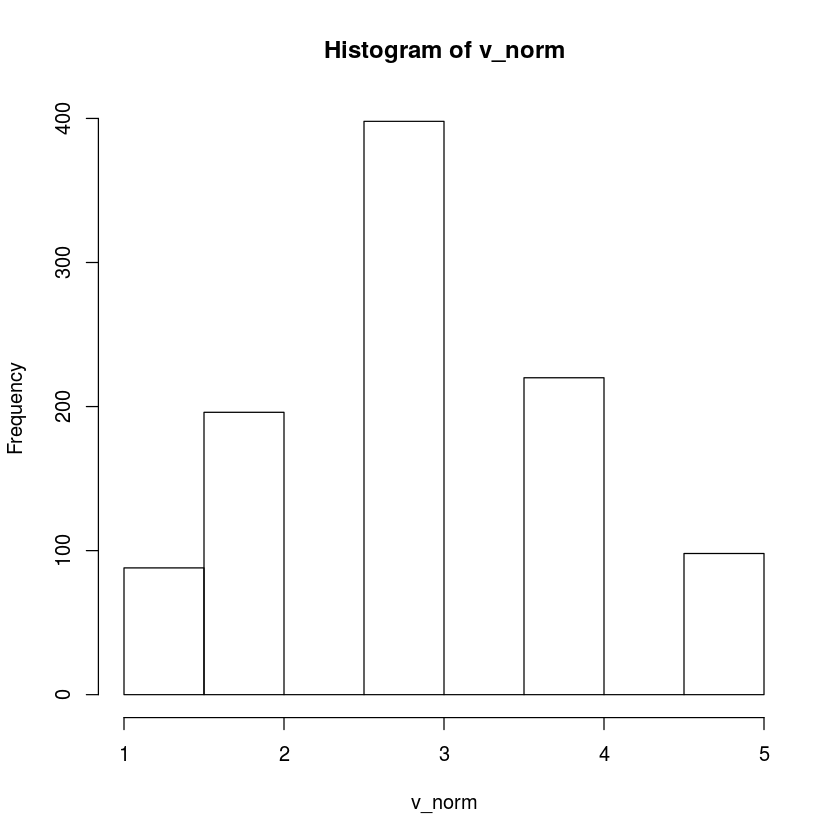

In [12]:
# Generar un histograma
hist(v_norm)

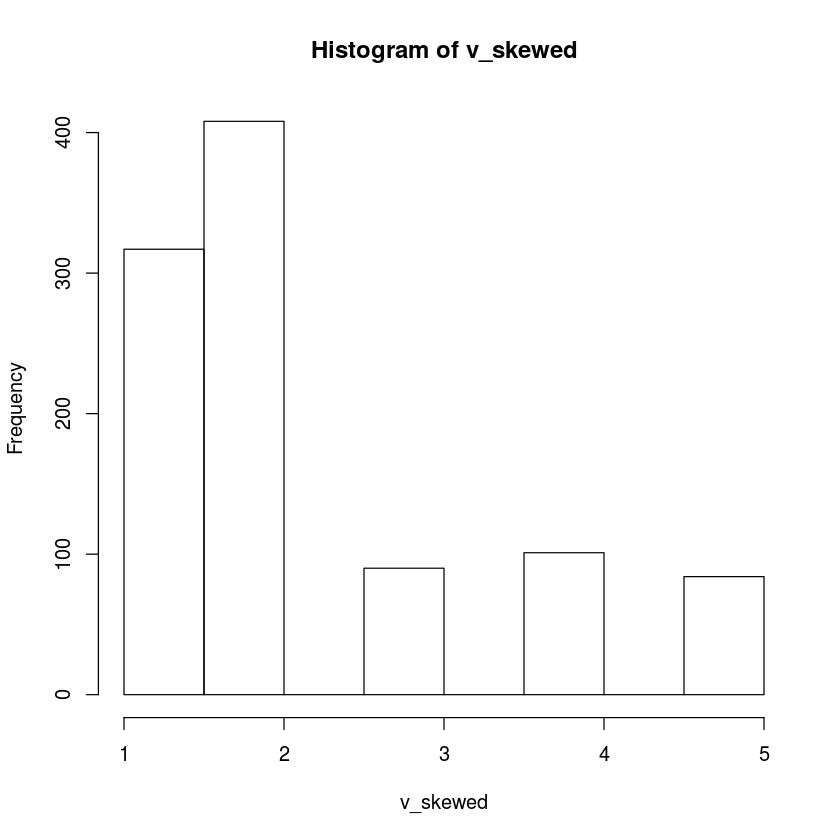

In [15]:
hist(v_skewed)

**Función de densidad de probabilidad** 

La función de densidad de probabilidad tiene varios usos. Uno de ellos es que permite tener una estimación de la distribución de la población en término de sus probabilidades.

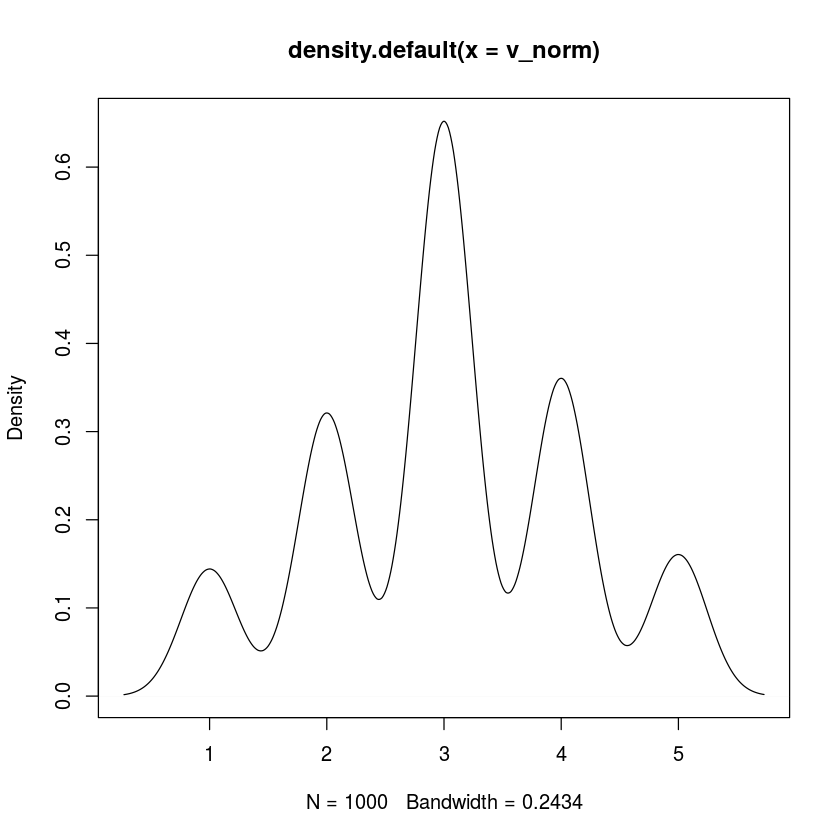

In [18]:
plot(density(v_norm))

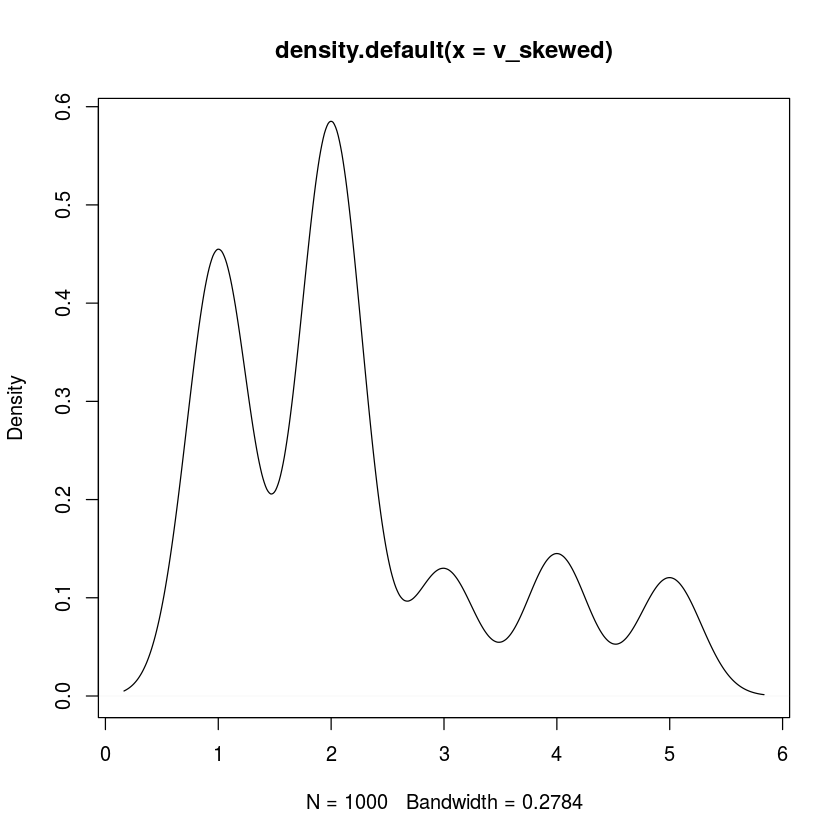

In [17]:
plot(density(v_skewed))


**Boxplot**

Los gráficos de caja o boxplot permiten visualizar rápidamente los datos agrupados en [cuartiles](https://es.wikipedia.org/wiki/Cuartil), es decir, los porcentajes de distribución. 

Es particularmente útil en la identificación de datos anómalos o atípicos ([outliers](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico))

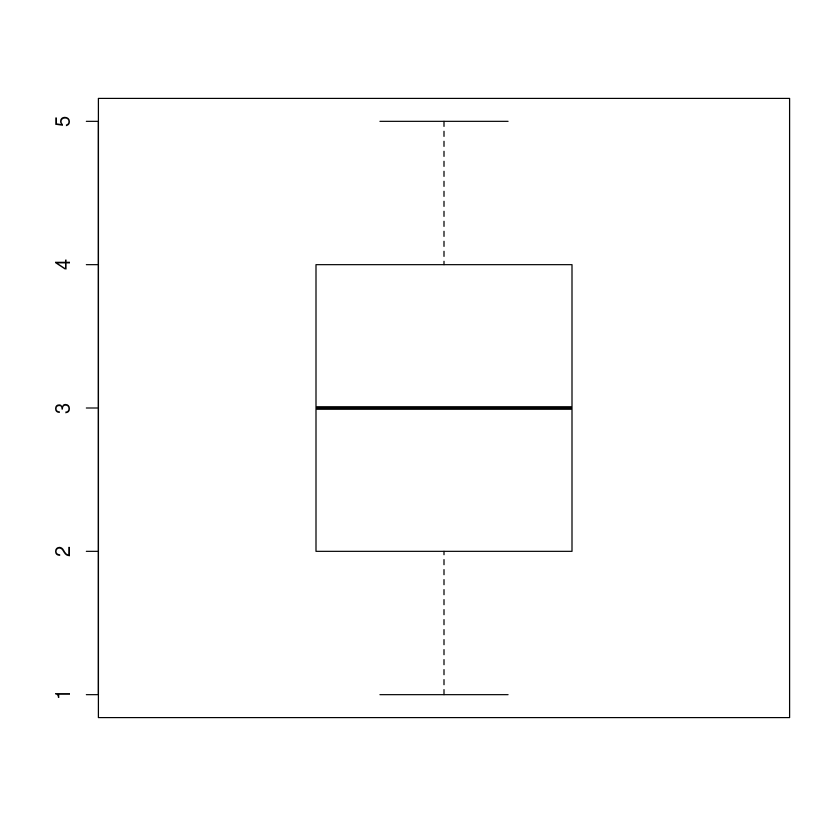

In [19]:
boxplot(v_norm)

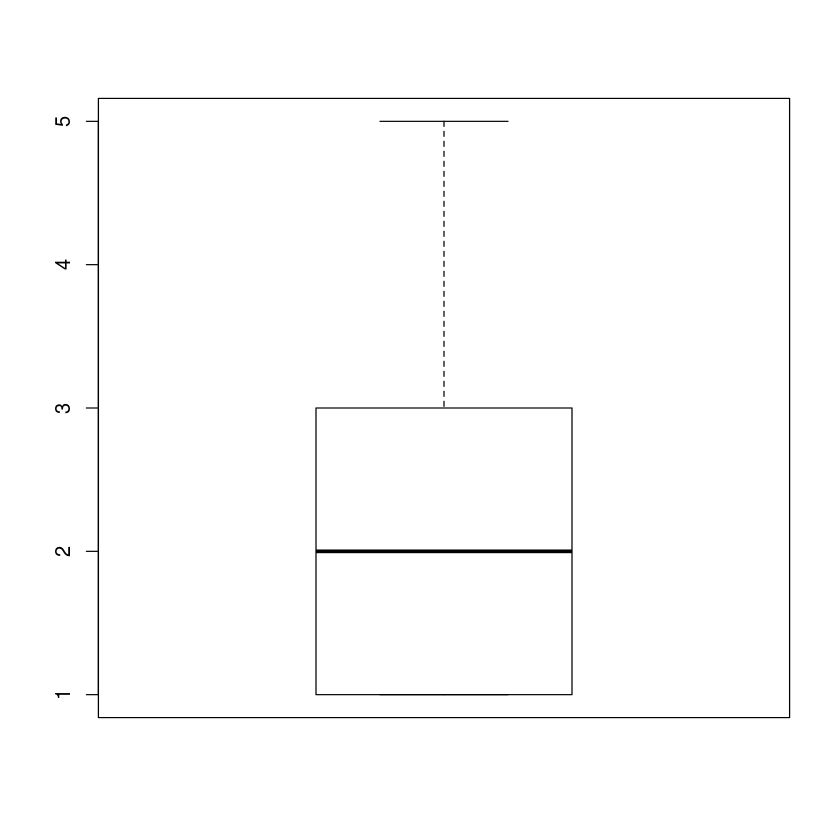

In [20]:
boxplot(v_skewed)

**Dispersión**

Los gráficos de dispersión pueden graficarse en R con la función `plot`. Esta función es muy versátil. Veamos algunos ejemplos.

Comencemos graficando las tablas de contingencia con las que venimos trabajando.

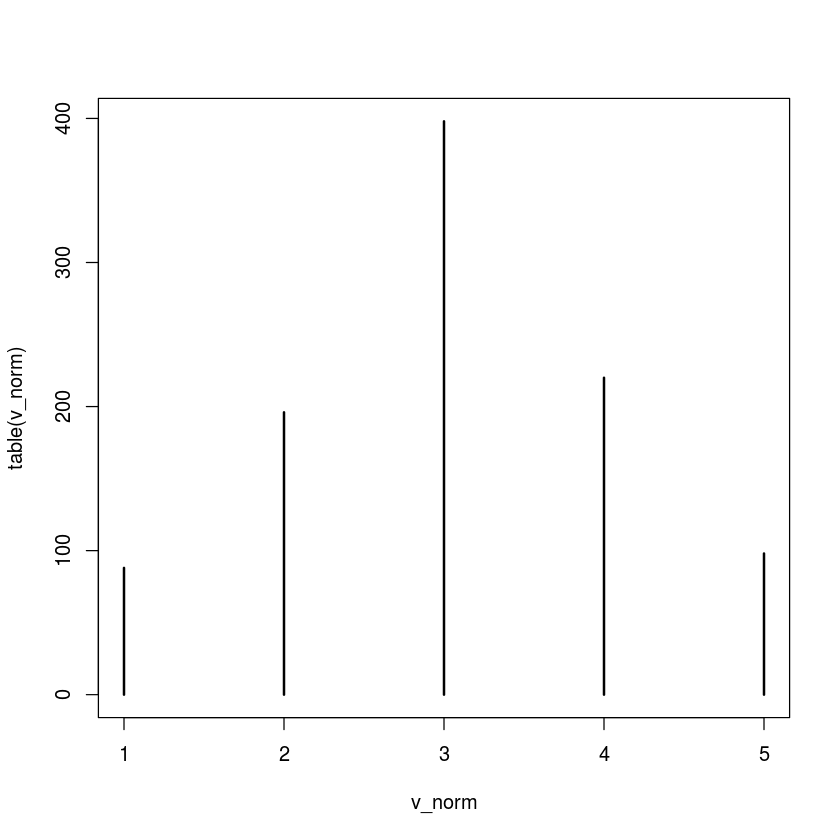

In [83]:
plot(table(v_norm))

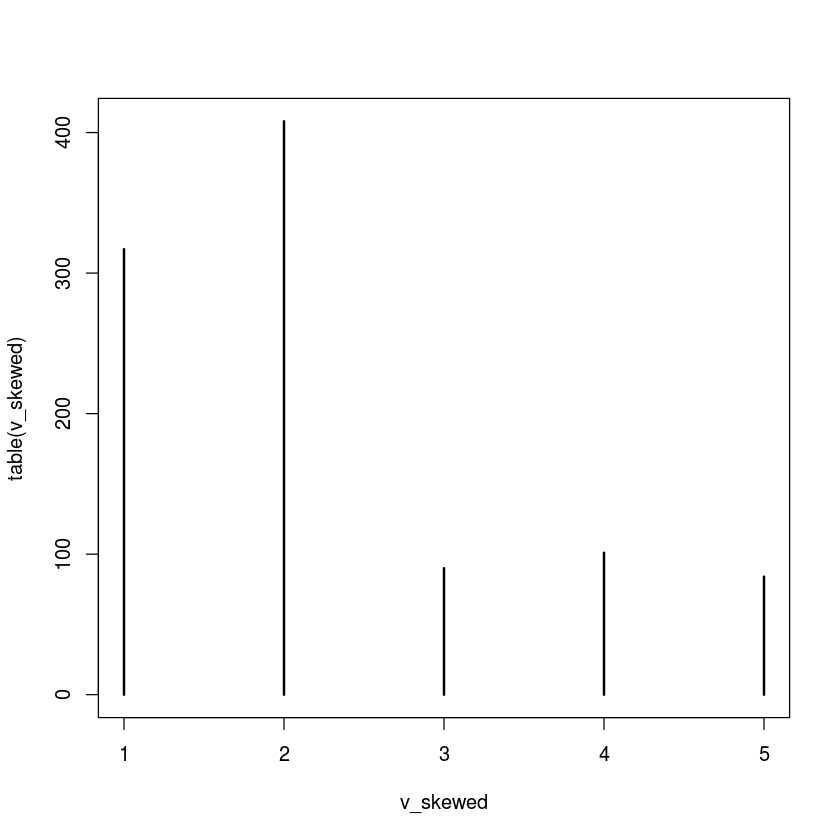

In [84]:
plot(table(v_skewed))

`plot` permite distintos tipos de visualizaciones a partir de sus argumentos. Veamos por ejemplo cómo cambiar el tipo de gráfico.

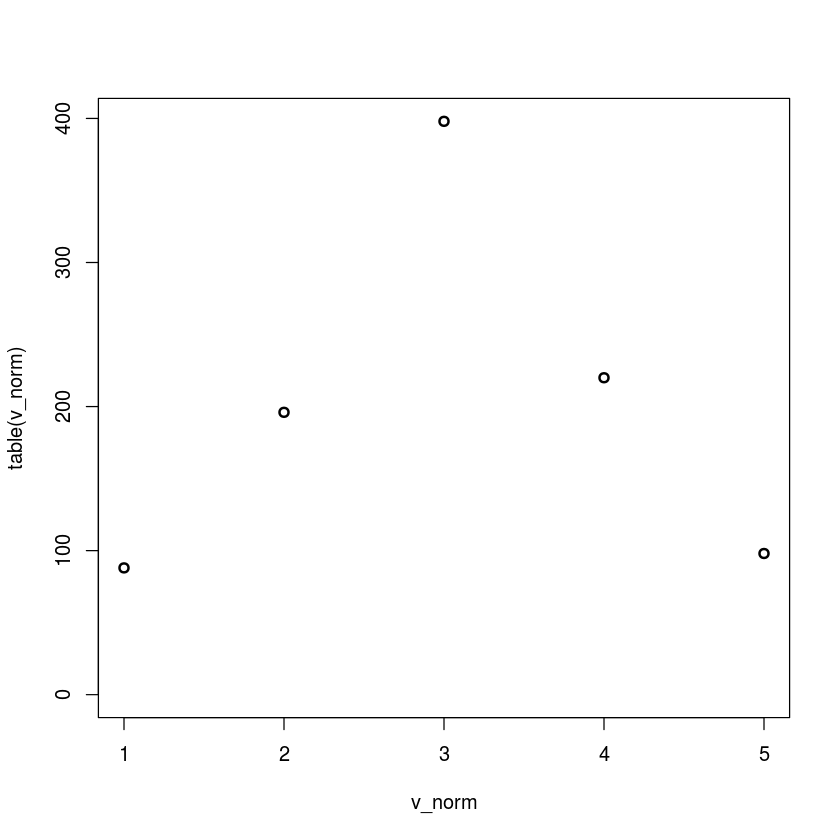

In [87]:
# Puntos
plot(table(v_norm), type = 'p')

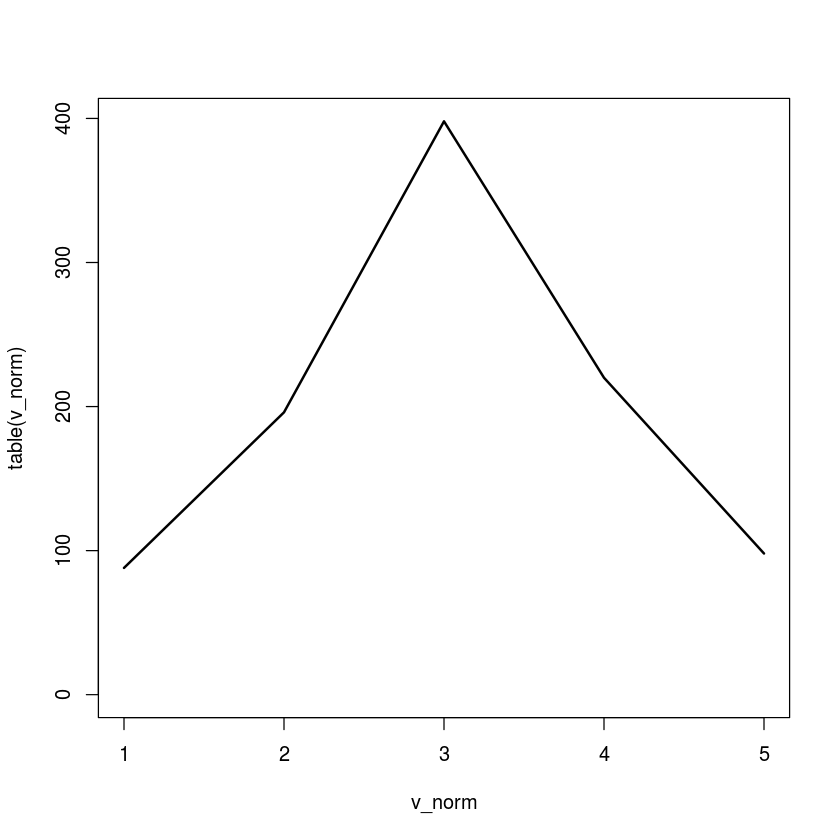

In [88]:
# Líneas
plot(table(v_norm), type = 'l')

### Tu turno!

Genera un histograma, un boxplot, y un gráfico de dispersión de la data$variable1

In [89]:
# Generar un histograma
datos <- data$variable1

              # COMPLETAR con la función correspondiente para los datos
              # solicitados

In [ ]:
# Generar un boxplot
              # COMPLETAR con la función correspondiente para los datos
              # solicitados

In [90]:
# Generar un gráfico de dispersión
              # COMPLETAR con la función correspondiente para los datos
              # solicitados